In [1]:
from importlib import reload
import src.utils.utils_functions
reload(src.utils.utils_functions)

<module 'src.utils.utils_functions' from 'c:\\Users\\nouxy\\Documents\\MA3\\Applied data analysis\\Project\\GIT_PROJECT\\src\\utils\\utils_functions.py'>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
import numpy as np
import os
from pathlib import Path

from src.utils.utils_functions import *

In [3]:
root = Path(os.getcwd()).parent

#Change for each one of where your data is. For me in Dataset I have all the three folders
dataset_path = os.path.join(root,'Dataset')

FULL = "full"
FULL_PATH = os.path.join(dataset_path,FULL)

breweries_df = pd.read_csv(os.path.join(FULL_PATH, 'breweries.csv'))
beers_df = pd.read_csv(os.path.join(FULL_PATH, 'beers.csv'))
users_df = pd.read_csv(os.path.join(FULL_PATH, 'users.csv'))
ratings_df_tmp = pd.read_csv(os.path.join(FULL_PATH,'ratings.csv'))
sentiment_df = pd.read_csv(os.path.join(FULL_PATH, 'beer_reviews_with_sent.csv'))

C:\Users\nouxy\AppData\Local\Temp\ipykernel_22592\2803423297.py:10: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  beers_df = pd.read_csv(os.path.join(FULL_PATH, 'beers.csv'))
C:\Users\nouxy\AppData\Local\Temp\ipykernel_22592\2803423297.py:11: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  users_df = pd.read_csv(os.path.join(FULL_PATH, 'users.csv'))


In [34]:
sentiment_df = pd.read_csv(os.path.join(FULL_PATH, 'beer_reviews_with_sent.csv'))

In [29]:
ratings_df = ratings_df_tmp.copy(deep=True)

In [30]:
ratings_df.head(3)

,date,appearance,aroma,palate,taste,overall,rating,text,dataset,id,id_brewery,id_user,id_beer,matched
0,1461664800,2.0,4.0,2.0,4.0,8.0,2.0,"Puszka 0,33l dzięki Christoph . Kolor jasnozło...",rb,1,16713,3317.0,45641,NaN
1,1487329200,2.0,3.0,2.0,4.0,8.0,1.9,Cerveza pale lager gabonesa. MÃ¡s floja que la...,rb,2,16713,3295.0,45642,NaN
2,1466762400,3.0,3.0,2.0,3.0,5.0,1.6,"Kolor- złoty, klarowny. Piana - drobna, średni...",rb,3,16713,3318.0,45642,NaN


In [31]:
#sentiment_df = sentiment_df.rename(columns={'id':'id_beer'})

In [35]:
sentiment_df.head()

,id,sentiment_bert
0,1,0.264435
1,2,-0.433727
2,3,0.146698
3,4,-0.067261
4,5,0.842057


In [36]:
sentiment_df = sentiment_df.set_index('id')

In [37]:
sentiment_df.head()

,sentiment_bert
id,
1,0.264435
2,-0.433727
3,0.146698
4,-0.067261
5,0.842057


In [38]:
ratings_df_with_sent = ratings_df.copy(deep=True)

In [39]:
ratings_df_with_sent.sample(1)

,date,appearance,aroma,palate,taste,overall,rating,text,dataset,id,id_brewery,id_user,id_beer,matched
636547,1497261600,3.0,7.0,3.0,6.0,12.0,3.1,Bottle at Ãlfestival 2017. Hazy golden colour...,rb,636304,1601,3445.0,89598,NaN


In [40]:
ratings_df_with_sent = ratings_df_with_sent.join(sentiment_df, on='id')

In [41]:
ratings_df = recompute_grade(ratings_df, min_grade_value = 1, max_grade_value = 5)

In [42]:
ratings_df_with_sent = ratings_df_with_sent.dropna(axis=0)
ratings_df_with_sent.head(2)

,date,appearance,aroma,palate,taste,overall,rating,text,dataset,id,id_brewery,id_user,id_beer,matched,sentiment_bert
3168,1315821600,4.0,5.0,3.0,5.0,9.0,2.6,"Appearance: Pours a clear, medium-brown body, ...",rb,3169,1,57.0,1,7122106.0,-0.010681
3174,1310032800,4.0,6.0,3.0,6.0,10.0,2.9,This one is labeled Product of the USA. It po...,rb,3175,1,58.0,1,7122111.0,0.188293


In [43]:
ratings_df_with_sent = recompute_grade_with_sent(ratings_df_with_sent, min_grade_value = 1, max_grade_value = 5)

In [44]:
ratings_df_with_sent.sample(2)

,date,appearance,aroma,palate,taste,overall,rating,text,dataset,id,id_brewery,id_user,id_beer,matched,sentiment_bert
4018160,1056880800,3.00,3.222222,3.00,2.333333,3.947368,3.311111,This brew poured a small head of fine bubbles ...,rb,4017091,8215,106.0,24323,11450283.0,2.757010
7646278,1495620000,4.25,4.250000,4.25,4.250000,4.250000,4.250000,Sample at Mikkeller Beer Celebration Copenhage...,ad,7644547,1585,301.0,7378,833091.0,4.112595


In [45]:
ratings_df, breweries_df, beers_df, users_df = filter_ratings_new(ratings_df, beers_df, breweries_df, users_df, 10, ['overall', 'aroma', 'palate', 'taste', 'appearance'])

Pourcentage of ratings remaining after dropping rows with nan values in selected attributes: 76.65 %
Pourcentage of ratings remaining after dropping rating for which beer has too few valid ratings : 68.65 %
Pourcentage of beers remaining after dropping rating for which a beer has too few valid ratings : 100.00 %
Pourcentage of breweries remaining after dropping rating for which a beer has too few valid ratings : 100.00 %
Pourcentage of users remaining after dropping rating for which a beer has too few valid ratings : 100.00 %


In [46]:
ratings_df_with_sent, breweries_df_with_sent, beers_df_with_sent, users_df_with_sent = filter_ratings_new(ratings_df_with_sent, beers_df, breweries_df, users_df, 10, ['overall', 'aroma', 'palate', 'taste', 'appearance', 'sentiment_bert'])

Pourcentage of ratings remaining after dropping rows with nan values in selected attributes: 100.00 %
Pourcentage of ratings remaining after dropping rating for which beer has too few valid ratings : 46.43 %
Pourcentage of beers remaining after dropping rating for which a beer has too few valid ratings : 0.49 %
Pourcentage of breweries remaining after dropping rating for which a beer has too few valid ratings : 2.11 %
Pourcentage of users remaining after dropping rating for which a beer has too few valid ratings : 0.44 %


Plot distrib of variances to use GMM (as assume it is Gaussian)

In [47]:
ratings_df_with_sent.head()

,overall,aroma,palate,taste,appearance,sentiment_bert,id_beer,id_user,id_brewery
3257,3.315789,3.666667,4.0,3.222222,4.0,3.595294,3,64.0,1
3265,3.736842,4.111111,3.0,3.666667,3.0,3.850310,3,65.0,1
3268,3.315789,3.222222,2.0,2.777778,4.0,3.702430,3,58.0,1
3280,3.736842,3.222222,4.0,3.666667,3.0,3.371176,3,57.0,1
3281,4.157895,3.666667,4.0,3.666667,4.0,4.213963,3,60.0,1


In [48]:
var_attr = compute_variance_per_attribute(ratings_df, ['appearance', 'aroma', 'palate', 'taste','overall'])
var_attr_with_sent = compute_variance_per_attribute(ratings_df_with_sent, ['appearance', 'aroma', 'palate', 'taste','overall', 'sentiment_bert'])

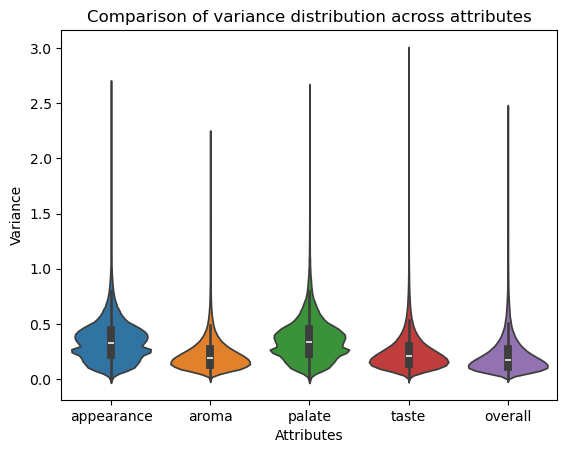

In [49]:
plot_var_distrib_violin(var_attr)

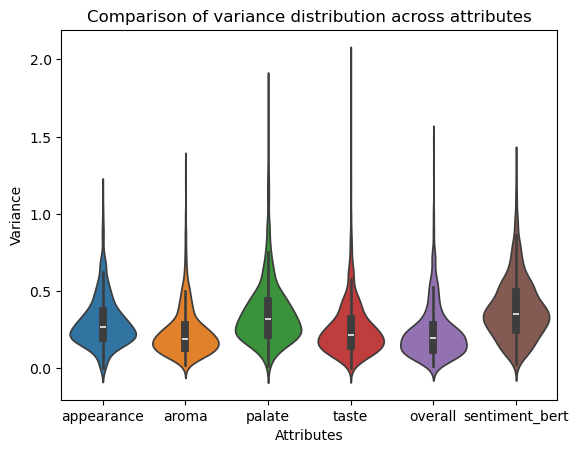

In [50]:
plot_var_distrib_violin(var_attr_with_sent)

id_beer
3        0.121102
44       0.530813
54       0.128228
256      0.297296
344      0.491356
           ...   
45384    0.414889
45391    1.327620
45392    0.278078
45517    0.237908
45607    0.056944
Name: sentiment_bert, Length: 727, dtype: float64

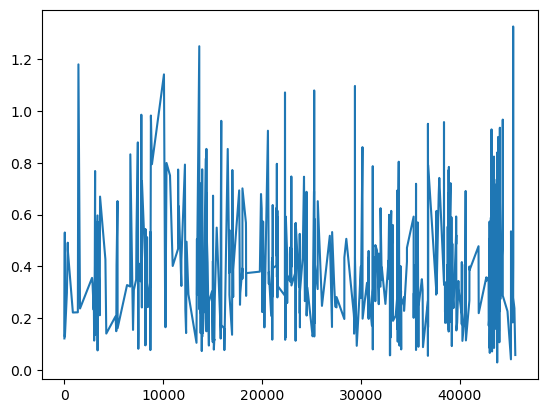

In [52]:
plt.plot(var_attr_with_sent.sentiment_bert)
var_attr_with_sent.sentiment_bert